# Random Forest (Floresta Randômica)

A floresta aleatória é um modelo de aprendizagem baseado em árvores de decisão.
As árvores de decisão são maneiras extremamente intuitivas de classificar ou rotular objetos: você simplesmente faz uma série de perguntas projetadas para se concentrar na classificação.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test['PassengerId']
print('Train shape : ',train.shape)
print('Test shape : ',test.shape)

Train shape :  (891, 12)
Test shape :  (418, 11)


In [3]:
df = pd.DataFrame(train)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(7.5, -0.5)

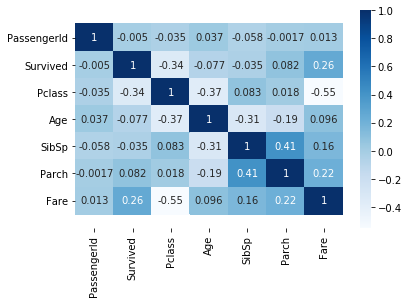

In [4]:
ax = sns.heatmap(train.corr(), cmap=plt.cm.Blues, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [5]:
le = LabelEncoder()

train['Sex'] = le.fit_transform(train['Sex'].astype(str))
train['Embarked'] = le.fit_transform(train['Embarked'].astype(str))

train.drop(['PassengerId'], axis = 1, inplace = True)
train.drop(['Name'], axis = 1, inplace = True)
train.drop(['Ticket'], axis = 1, inplace = True)
train.drop(['Cabin'], axis = 1, inplace = True)
train.drop(['Age'], axis = 1, inplace = True)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2


## Treino e Avaliação do Modelo 

In [6]:
#Divide the dataset into features and target variables
X=train.iloc[:,1:]
Y=train['Survived'].ravel()

#Divide the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [7]:
#Fit the training data into the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)
predict = model.predict(X_test)

In [8]:
print("A acurácia do modelo é :")
print(accuracy_score(predict, Y_test)*100)

A acurácia do modelo é :
84.75336322869956
